In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log2
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Data retrieval and formatting

In [2]:
# Load data for RNAseq TPM:
# Cvs has 40 columns, comprising 4 replicates of each sample

data = pd.read_csv('rnaSeqTPM.tsv',delimiter='\t')
data.head()

,target,AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980,AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa,AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b,AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e,AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940,AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec,AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f,AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c,AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf,...,AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1,AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0,AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941,AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca,AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9,AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09,AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93,AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49,AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3,AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [3]:
# Rename columns

data = data.rename(columns={'AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980':'AC10_1',
       'AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa':'AC10_2','AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b':'AC10_3',
       'AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e':'AC10_4','AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940':'AC1_1',
       'AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec':'AC1_2','AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f':'AC1_3',
       'AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c':'AC1_4','AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf':'AC2_1',
       'AC-2_L002-ds.5a9da74220064ee89a9736bc85a52179':'AC2_2','AC-2_L003-ds.e6194500d53a4f33bfc7915c64a5beeb':'AC2_3',
       'AC-2_L004-ds.246b173490c3494a8eeea8621ec361d1':'AC2_4','AC-3_L001-ds.58010ec40df84a978e4af7d1a23d1af9':'AC3_1',
       'AC-3_L002-ds.454403b9d0ac4d72af1220546b5a630d':'AC3_2','AC-3_L003-ds.d83a7a6dd4c545b1b2170c1100cf2120':'AC3_3',
       'AC-3_L004-ds.6cf9ff6076264856a74212cfc7410e96':'AC3_4','AC-4_L001-ds.e45254993f044e7da3deb87a28e560a4':'AC4_1',
       'AC-4_L002-ds.fcf9658251c14b40b7ed788a6f9d1adb':'AC4_2','AC-4_L003-ds.109477542e734e6c8c93bedd405a3039':'AC4_3',
       'AC-4_L004-ds.d101269468414b71a926cd9fc76cb004':'AC4_4','AC-5_L001-ds.bd13708d4f784119ac0a2ae972e37f66':'AC5_1',
       'AC-5_L002-ds.ffd221b8bc164be3b6d604985219be02':'AC5_2','AC-5_L003-ds.8d1b59e10e7b4ae7bd089b99744e3802':'AC5_3',
       'AC-5_L004-ds.9b5362075da148408cb715587ce595a5':'AC5_4','AC-6_L001-ds.3ab380d9704849cda96aed57e96e6586':'AC6_1',
       'AC-6_L002-ds.6d19015742374d079236d90ae72f1d2a':'AC6_2','AC-6_L003-ds.f4a789852ddb477bad1ab00670699315':'AC6_3',
       'AC-6_L004-ds.a5e6028617944efd9b68ef878d9df54e':'AC6_4','AC-7_L001-ds.fc6c5f45845543248f39571f54a4fa7b':'AC7_1',
       'AC-7_L002-ds.9da13968f23c45489f6bcee732149847':'AC7_2','AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1':'AC7_3',
       'AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0':'AC7_4','AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941':'AC8_1',
       'AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca':'AC8_2','AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9':'AC8_3',
       'AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09':'AC8_4','AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93':'AC9_1',
       'AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49':'AC9_2','AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3':'AC9_3',
       'AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da':'AC9_4'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC7_3,AC7_4,AC8_1,AC8_2,AC8_3,AC8_4,AC9_1,AC9_2,AC9_3,AC9_4
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [4]:
# Take mean every four replicates of each sample, add as new column and rename columns as appropiate

n = 1
m = 5
p = 1
for _ in range(10):
    
    data[f'AC{p}'] = data.iloc[:,n:m].mean(axis=1)
    p = p+1
    n = n+4
    m = m+4

data = data.rename(columns ={'AC1':'AC10','AC2':'AC1','AC3':'AC2','AC4':'AC3','AC5':'AC4','AC6':'AC5','AC7':'AC6',
                             'AC8':'AC7','AC9':'AC8','AC10':'AC9'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC10,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,20.406225,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,19.916900,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,11.846675,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,10.624565,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,103.267950,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850


In [5]:
# Rename columns with samples names

data_rnas = data[['target','AC1','AC2','AC3','AC4','AC5','AC6','AC7','AC8','AC9','AC10']]
data_rnas = data_rnas.rename(columns ={'target':'target gene','AC1':'Brain','AC2':'Univ Stratagene','AC3':'Univ DriverMap',
                             'AC4':'Univ Clontech','AC5':'Univ BioChain','AC6':'Univ Rare','AC7':'WB-Activated',
                             'AC8':'WB-Disease','AC9':'Univ ImmuneT10','AC10':'Hemat System3'})
data_rnas = data_rnas.set_index('target gene')
data_rnas.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818,20.406225
13331|PEX14,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950,19.916900
6630|RAD52,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092,11.846675
16802|CLYBL,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315,10.624565
6645|RANBP1,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850,103.267950


In [6]:
# Function that takes log of values in one column and adds new column of logs to df

def log_df(df):
    columns_list = df.columns
    
    for column in columns_list:
        
        # Make new column name
        col_name = column+'_log'
        
        # Make list with values of rows in original column
        col_numbers = list(df[column])
        
        # Take logs and store in new array
        log_numbers = [log2(num) if num >1 else 0 for num in col_numbers]
        
        # Make new column in original df with log array
        df[col_name] = log_numbers
    

In [7]:
# Apply log function to df

# First make copy of df so we don't modify it, and apply log function
data_rnas2 = data_rnas.copy(deep=True)
log_df(data_rnas2)

#Second, make df with only logs
data_rnas_log = data_rnas2.iloc[:,10:20]
data_rnas_log.head()

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
target gene,,,,,,,,,,
14266|CENPU,1.106975,5.417636,5.688838,4.218981,1.809332,5.863041,0.954578,6.012701,2.890217,4.350937
13331|PEX14,5.222699,3.985974,3.994767,5.678326,4.147645,4.579289,4.340448,4.515457,4.411965,4.315921
6630|RAD52,3.383508,4.439073,3.728244,2.822310,2.342195,2.927951,3.482061,2.284561,3.583410,3.566410
16802|CLYBL,3.503190,3.141185,2.248114,4.365824,4.742724,3.173412,2.190892,3.720892,2.861819,3.409332
6645|RANBP1,6.042402,8.436567,7.820670,6.991815,5.585921,6.686009,6.478737,7.418152,6.246956,6.690249


In [8]:
# Making transpose df to do heatmap more efficient

tab_rnas = data_rnas_log.transpose()
tab_rnas.head()

target gene,14266|CENPU,13331|PEX14,6630|RAD52,16802|CLYBL,6645|RANBP1,12149|KDF1,11733|TBC1D30,14535|TMEM258,12400|LRG1,11931|HYAL1,...,16176|GAB3,13299|ZNF701,5706|NEB,15110|ZNF775,3181|CCNB2,16735|BBS12,14784|ANKRD27,3464|COL19A1,10238|TCTA,10545|CA5A
Brain_log,1.106975,5.222699,3.383508,3.503190,6.042402,2.245839,5.061035,6.693610,0.000000,4.054180,...,0.000000,2.075561,0.337782,5.139967,0.000000,2.449345,4.636225,3.332654,4.913491,0.000000
Univ Stratagene_log,5.417636,3.985974,4.439073,3.141185,8.436567,2.963911,2.822148,8.210013,4.251886,3.756653,...,0.685171,1.289013,0.064607,3.983449,6.592308,0.000000,4.254808,0.000000,3.761934,0.000000
Univ DriverMap_log,5.688838,3.994767,3.728244,2.248114,7.820670,4.729278,3.648200,7.627450,3.118327,0.785576,...,0.000000,2.836249,1.458984,3.313137,6.048997,0.793720,5.592719,0.000000,4.562096,0.000000
Univ Clontech_log,4.218981,5.678326,2.822310,4.365824,6.991815,1.497970,3.318626,6.803169,3.478247,5.185426,...,2.567949,1.039789,1.540372,4.355929,4.513309,2.231803,5.537454,0.849012,4.562743,0.000000
Univ BioChain_log,1.809332,4.147645,2.342195,4.742724,5.585921,1.712148,0.695954,6.224163,7.465277,6.353782,...,0.000000,2.461696,0.000000,1.378955,1.755232,0.178158,3.819152,0.000000,4.572714,4.058026


In [9]:
# Load data for DriverMap (DM) from csv
# Csv has 20 columns, comprising 10 same samples and 2 different treatments

data_dm2 = pd.read_csv('DriverMapTPM.tsv',delimiter='\t')
data_dm2 = data_dm2.rename(columns={'Unnamed: 0':'target gene'})
data_dm2 = data_dm2.set_index('target gene')
data_dm2.head()

,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
target gene,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,0.000,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,0.00000,0.546198,48.0853,74.59220,26.27370,1.19616,45.71820,2.83643,122.2470
13331|PEX14,19.08750,14.08670,0.000,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,0.00000,33.521000,26.2342,24.65790,36.15540,15.84860,18.20870,14.82460,34.4379
6630|RAD52,3.66106,4.29017,0.000,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,3.60232,7.170180,10.8381,6.08676,6.61974,3.46454,7.99667,2.27730,8.2883
16802|CLYBL,11.47500,12.58540,34.475,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,...,9.44277,38.90040,11.170000,12.2971,4.87524,24.46830,21.38690,12.00770,3.81662,16.9272
6645|RANBP1,71.64050,79.22280,0.000,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,7.38547,35.480200,105.3570,93.05350,46.65610,24.73280,47.38680,41.90630,118.2290


In [10]:
# Make new df with only first treatment, rearrange columns and rename them with sample's names

data_dm = data_dm2.iloc[:,0:11]
data_dm = data_dm[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11']]
data_dm.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain','Univ Rare',
                'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3']
data_dm.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,96.96370,17.60490,23.53280
13331|PEX14,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,29.29620,19.08750,14.08670
6630|RAD52,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,4.92102,3.66106,4.29017
16802|CLYBL,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,18.39990,11.47500,12.58540
6645|RANBP1,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,134.60400,71.64050,79.22280


In [11]:
# Aplly log function to df

# First make copy of df so we don't modify it and apply log function
data_dm_b = data_dm.copy(deep=True)
log_df(data_dm_b)

# Second, make df with only logs, rename columns so they're different from the RNAseq log df
data_dm_log = data_dm_b.iloc[:,10:20]
data_dm_log.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain','Univ Rare',
                'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3']
data_dm_log.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035
16802|CLYBL,4.078499,3.836106,2.301154,4.924432,4.855118,3.956094,2.858069,4.201626,3.520422,3.653679
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844


In [12]:
# Making transpose df to do heatmap more efficient

tab_dm = data_dm_log.transpose()
tab_dm.head()

target gene,14266|CENPU,13331|PEX14,6630|RAD52,16802|CLYBL,6645|RANBP1,12149|KDF1,11733|TBC1D30,14535|TMEM258,12400|LRG1,11931|HYAL1,...,16176|GAB3,13299|ZNF701,5706|NEB,15110|ZNF775,3181|CCNB2,16735|BBS12,14784|ANKRD27,3464|COL19A1,10238|TCTA,10545|CA5A
Brain,0.000000,4.790350,2.398919,4.078499,5.523496,1.228763,4.103053,6.710173,0.000000,1.276145,...,0.306146,1.214970,0.332553,3.694891,0.000000,2.398799,5.263639,1.572458,4.136503,0.000000
Univ Stratagene,5.429904,4.643897,2.805206,3.836106,7.772070,1.961342,2.042179,8.095830,2.952479,3.981332,...,1.133307,1.688910,0.000000,3.407176,3.999648,0.966903,5.717493,0.000000,3.399294,0.560686
Univ DriverMap,6.139740,4.115940,1.714127,2.301154,7.165520,3.665779,3.331720,7.717162,2.640952,0.699054,...,0.000000,2.022876,0.497485,1.224682,3.687833,1.068299,5.943832,0.000000,3.814048,0.000000
Univ Clontech,4.420557,4.691986,2.295414,4.924432,6.359249,2.496324,2.617870,6.586897,2.452421,4.728546,...,2.585083,0.755546,0.000000,3.172569,2.424041,1.751399,5.473982,0.000000,4.217626,0.000000
Univ BioChain,0.192889,3.635987,0.622256,4.855118,4.952082,1.895225,0.000000,5.822544,6.381131,6.184342,...,0.996779,0.895566,0.289598,0.508003,0.000000,0.000000,3.774924,0.000000,3.042280,3.868736


# Broad analysis of whole transcriptome sequencing differences between techniques

Text(0.5, 1.0, 'Heatmap for DM')

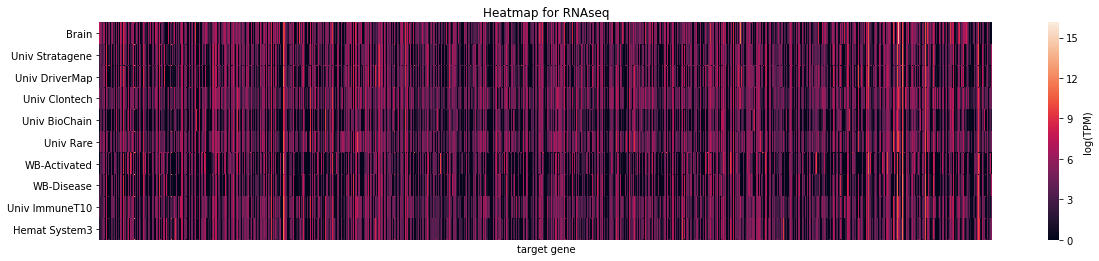

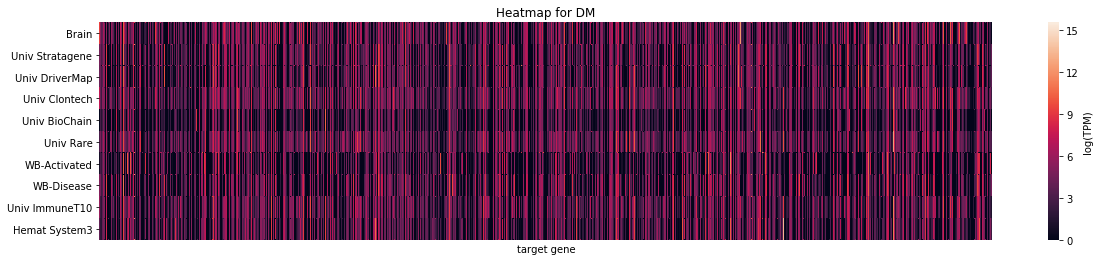

In [13]:
# First glimpse at difference between techniques: heatmap for logs of each gene, sample and technique

plt.figure(figsize = (20,4))
labels = list(data_dm_log.columns)
sns.heatmap(tab_rnas, xticklabels = False, yticklabels = labels, cbar_kws = {'label':'log(TPM)'})
plt.title('Heatmap for RNAseq')

plt.figure(figsize = (20,4))
sns.heatmap(tab_dm, xticklabels = False, yticklabels = labels, cbar_kws = {'label':'log(TPM)'})
plt.title('Heatmap for DM')

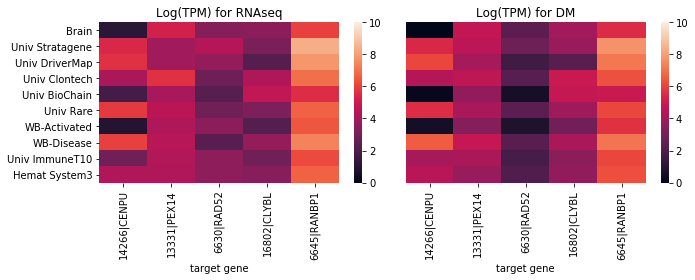

In [14]:
# Making heatmap for just 5 genes, to see how it looks

mini_rnas_log = data_rnas_log.head()
mini_rnas_log = mini_rnas_log.transpose()
mini_dm_log = data_dm_log.head()
mini_dm_log = mini_dm_log.transpose()

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
sns.heatmap(mini_rnas_log, yticklabels = labels, ax=ax1, vmin=0, vmax=10)
ax1.set_title('Log(TPM) for RNAseq')

ax2 = fig.add_subplot(1,2,2)
sns.heatmap(mini_dm_log, yticklabels = False, ax=ax2, vmin=0, vmax=10)
ax2.set_title('Log(TPM) for DM')

plt.tight_layout()

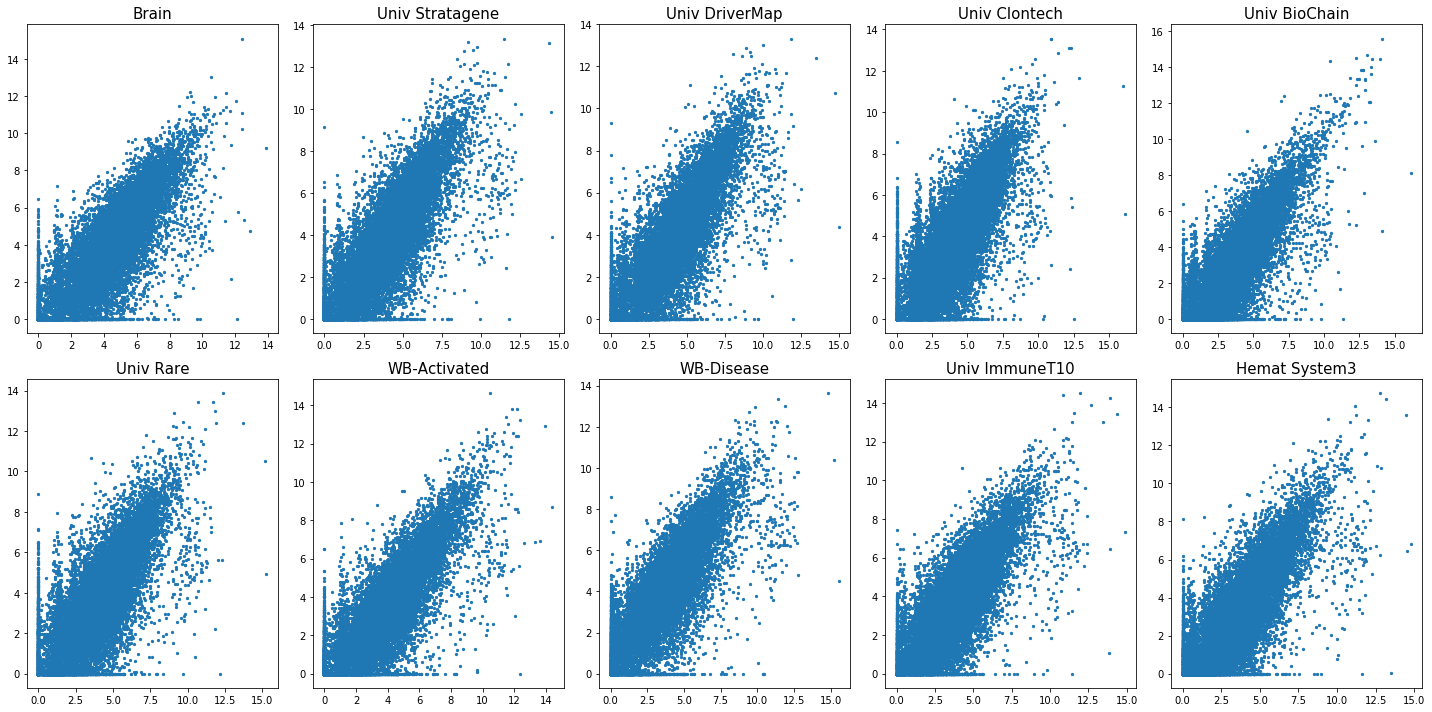

In [15]:
# To further evaluate if techniques are comparable, we do scatter plots of log(RNAseq) vs log(DM) for each sample,
# because samples are independent

fig, ax = plt.subplots(2,5,figsize=(20,10))
n=0
for i in range(2):
    for j in range(5):
        ax[i,j].scatter(x=data_rnas_log.iloc[:,n], y=data_dm_log.iloc[:,n], s=5)
        ax[i,j].set_title(labels[n], fontsize=15)
        n=n+1

plt.tight_layout()

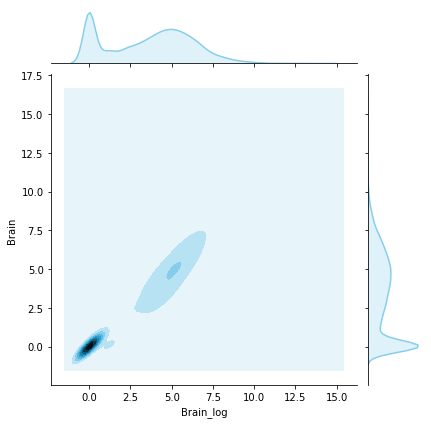

In [16]:
# Because scatter plot doesn't let you see density of points, and to smooth the dispersion, we do a 
# Kernel-Density Estimate plot (KDE)

sns.jointplot(x=data_rnas_log['Brain_log'],y=data_dm_log['Brain'],color='skyblue',kind='kde')

In [41]:
# Scatter and KDE seem to show a good correlation, so we use corr function to estimate correlation
# The accepted value for RNA sequencing techniques of r that implies correlation is >0.9

corr_coeffs = {}
for i in range(10):
    temp_df = pd.concat([data_rnas_log.iloc[:,i],data_dm_log.iloc[:,i]],axis=1)
    coeff = temp_df.corr()
    corr_coeffs[data_dm_log.columns[i]] = corr_coeffs[i].iloc[0,1]
    
corr_coeffs_df = pd.DataFrame.from_dict(corr_coeffs,orient='index').rename(columns={0:'Pearson correlation coeff'})
corr_coeffs_df

KeyError: 0

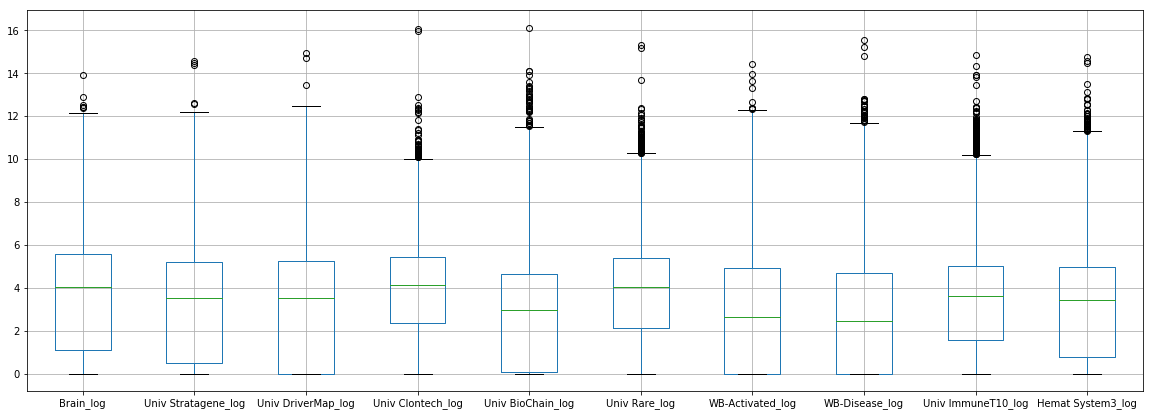

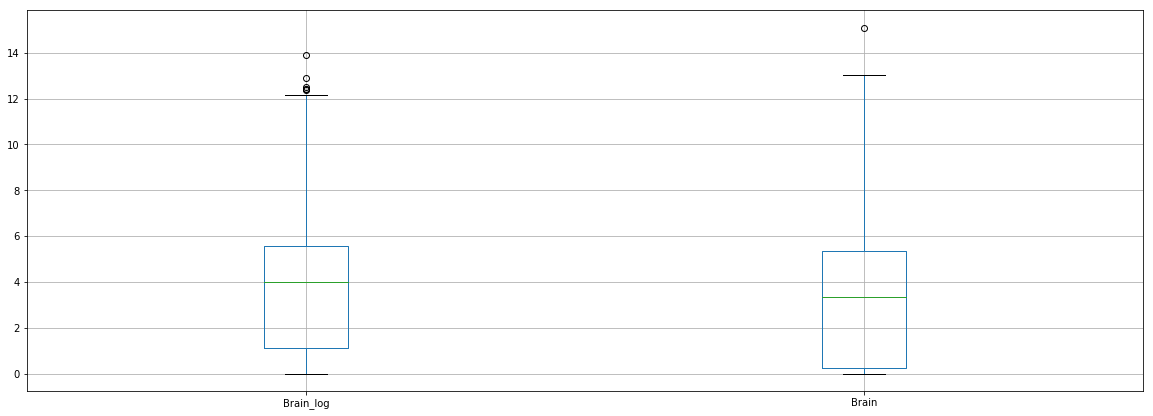

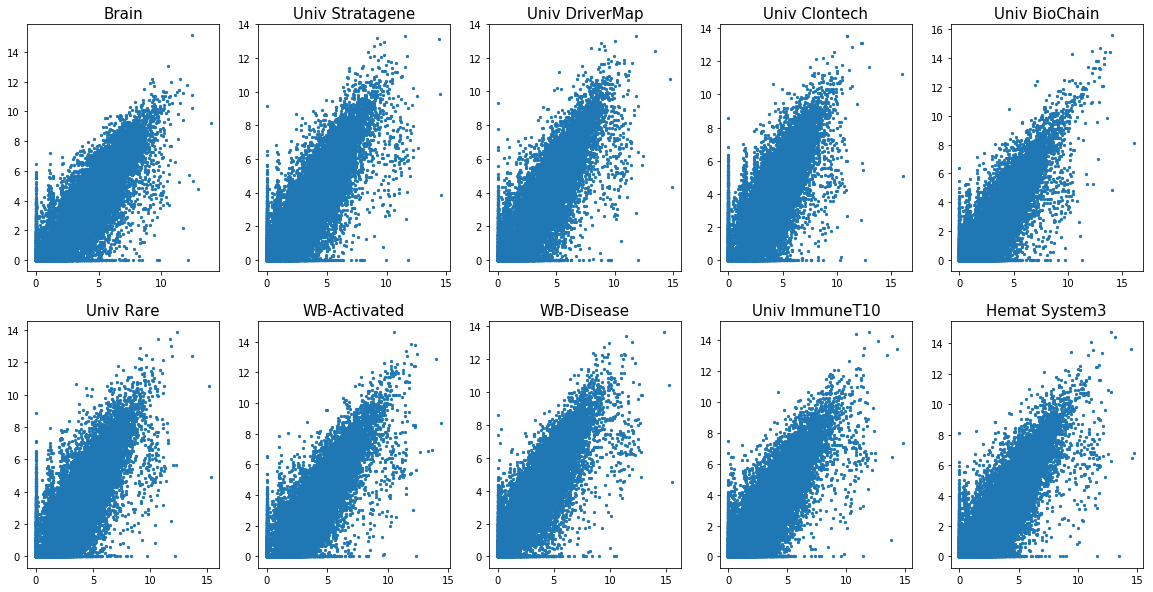

In [42]:
# Box plots to visualize outliers

plt.figure(figsize=(20,7))
plt.subplots
data_rnas_log.boxplot()

#plt.figure(figsize=(20,7))
tempb = data_rnas_log['Brain_log']
tempc = data_dm_log['Brain']
tempd = pd.concat((tempb, tempc), axis=1)
plt.figure(figsize=(20,7))
tempd.boxplot()

fig, ax = plt.subplots(2,5,figsize=(20,10))
n=0
for i in range(2):
    for j in range(5):
        ax[i,j].scatter(x=data_rnas_log.iloc[:,n], y=data_dm_log.iloc[:,n], s=5)
        ax[i,j].set_title(labels[n], fontsize=15)
        n=n+1

## Partial conclusions

* From doing heatmaps, scatter and KDE, we make the following partial conclusions:
    - The two techniques seem to have similar coverage of genes, with both having a high density of low expressing genes or even genes that aren't pick up at all.
    - There appears to be some correlation between the two techniques for the genes with high-expression levels.
* We can't make an ANOVA test because data shows heteroskedasticity, so only Pearson correlation can be used.No pair of samples showed a Pearson correlation coefficient strong enough to imply correlation

# Analysis of detection ability of both techniques by level of expression of genes

In [22]:
# Looking for max value to make up bins
print(data_rnas_log.max())
print(data_dm_log.max())

Brain_log              13.903312
Univ Stratagene_log    14.583315
Univ DriverMap_log     14.943352
Univ Clontech_log      16.085180
Univ BioChain_log      16.124078
Univ Rare_log          15.296279
WB-Activated_log       14.428116
WB-Disease_log         15.530854
Univ ImmuneT10_log     14.854120
Hemat System3_log      14.756254
dtype: float64
Brain              15.099557
Univ Stratagene    13.344532
Univ DriverMap     13.315348
Univ Clontech      13.558564
Univ BioChain      15.569598
Univ Rare          13.873098
WB-Activated       14.635486
WB-Disease         13.637191
Univ ImmuneT10     14.502770
Hemat System3      14.745118
dtype: float64


In [23]:
# Make bins and function to cut df in 4 categories: genes that aren't pick up by the technique ("no read"), genes with 
# low, medium and high log of number of TPM (level of expression)

bins = [-1,0,4,7,18]
bin_labels = ['no read','low','medium','high']

def bin_logs(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
    for j in list(bin_dataf.columns):
        gr_count = bin_dataf.groupby(j)[j].count()
        bin_group[j] = gr_count
    
    return pd.DataFrame.from_dict(bin_group)

In [24]:
# Apply bin function to get counts of gene by bin for each technique

binned_rnas_data = bin_logs(data_rnas_log)
binned_rnas_data

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
no read,3973,4418,4832,2393,4693,2636,6585,6406,2998,3841
low,5492,6300,5818,6689,7718,6696,5582,6279,7869,7357
medium,7991,7106,6992,8722,5602,8448,5491,5311,7072,6739
high,1533,1165,1347,1185,976,1209,1331,993,1050,1052


In [25]:
binned_dm_data = bin_logs(data_dm_log)
binned_dm_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
no read,4554,4370,5439,2516,5909,2840,7029,6485,3511,4606
low,6384,7015,6246,7832,7888,7826,6258,5511,8038,7768
medium,6349,6023,5680,7027,4300,6827,4353,5406,6084,5345
high,1702,1581,1624,1614,892,1496,1349,1587,1356,1270


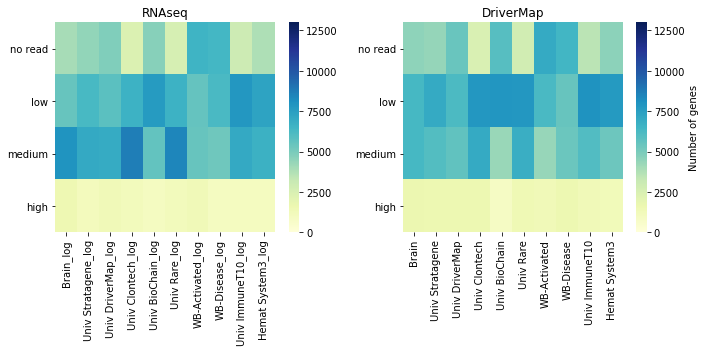

In [26]:
# Heatmaps to vizualize difference in counts of genes by level of expression

fig = plt.figure(figsize = (10,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(binned_rnas_data, cmap = 'YlGnBu', ax = ax1, vmin=0, vmax=13000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('RNAseq')

sns.heatmap(binned_dm_data, cmap = 'YlGnBu', ax = ax2, vmin=0, vmax=13000, cbar_kws = {'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation = 0)
ax2.set_title('DriverMap')

plt.tight_layout()

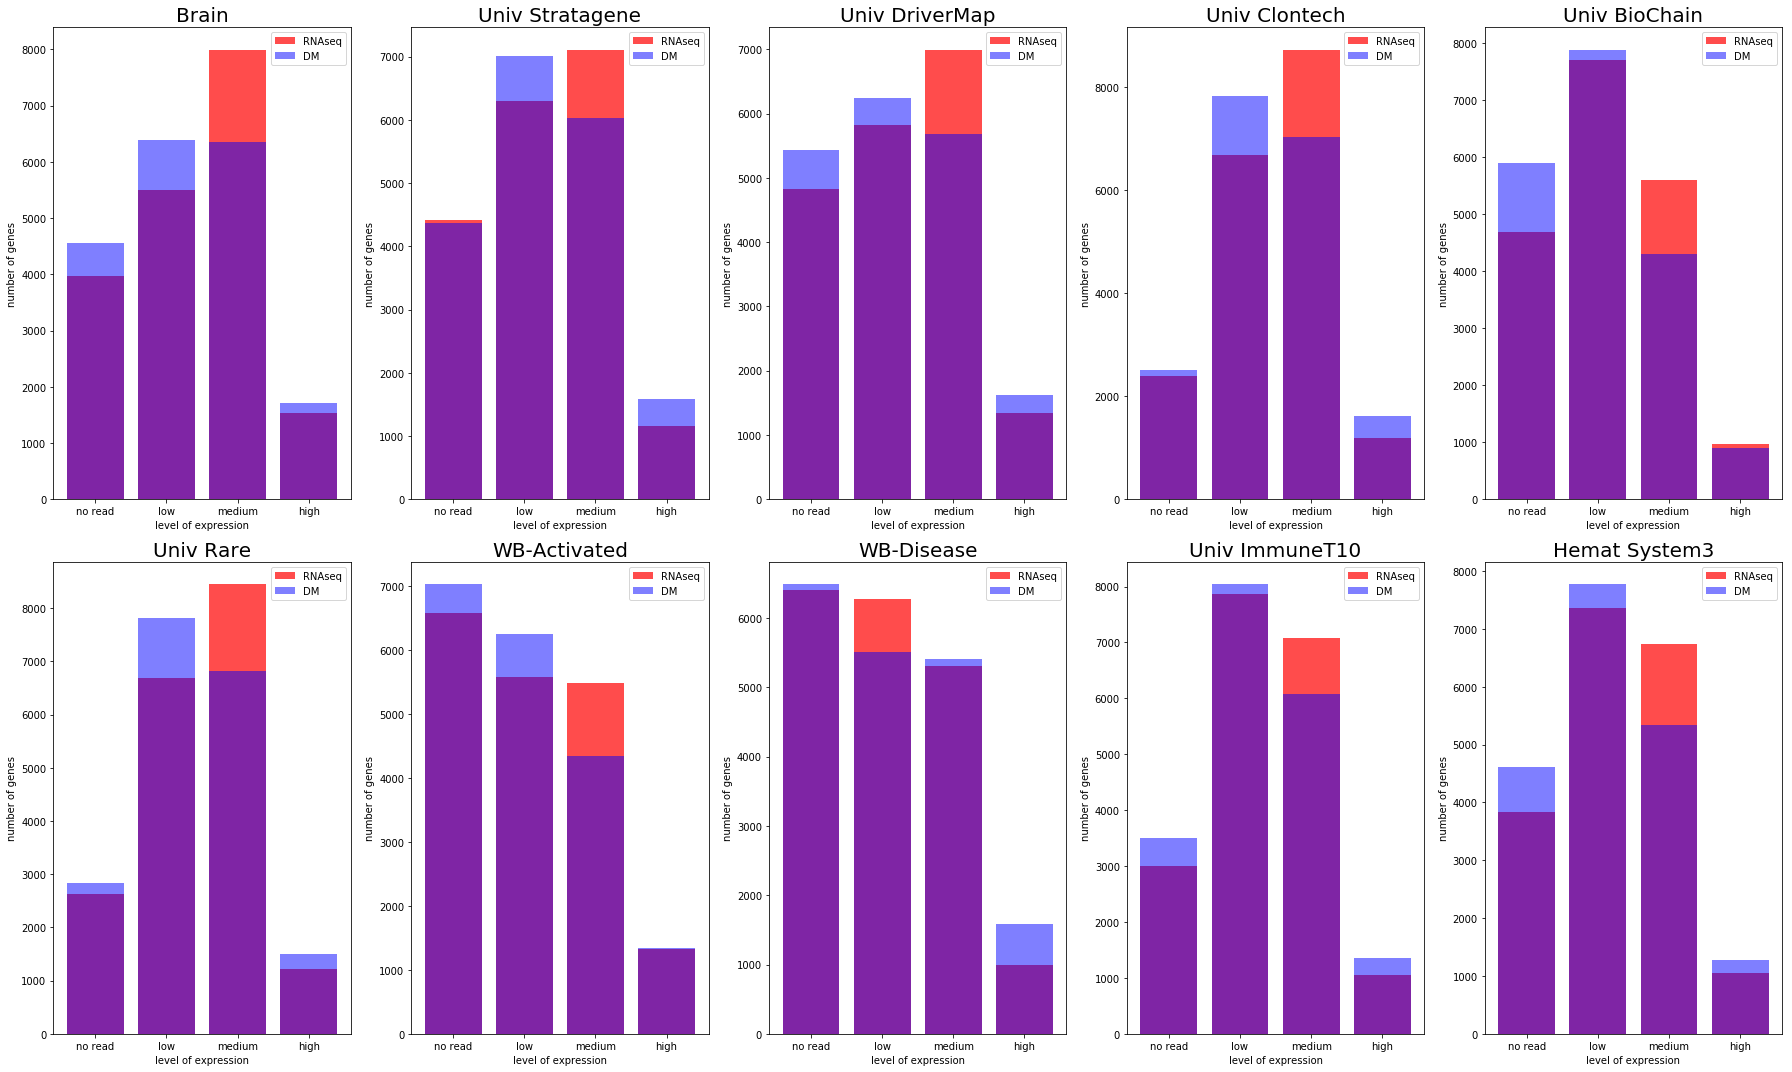

In [27]:
# Bar plots to better visualize the difference in count of genes by level of expression by sample

plt.figure(figsize=(25,15))

for i in range(10):
    title_font = {'size':'20'}
    plt.subplot(2,5,i+1)
    plt.bar(x = binned_rnas_data.index, height = binned_rnas_data.iloc[:,i], alpha=0.7, color='red',label='RNAseq')
    plt.bar(x = binned_rnas_data.index, height = binned_dm_data.iloc[:,i], alpha=0.5, color='blue',label='DM')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.legend()
    
plt.tight_layout()

## Partial conclusion:

* DriverMap seems to consistently have more genes unread than RNAseq

# Analysis of detection ability of highly expressing genes by samples by both techniques

In [28]:
# Make function to get back dictionary containing genes labeled as high expressing

def find_highs(df):
    high_genes = {}
    samples = list(df.columns)
    
    for sample in samples:
        sample_cut = pd.cut(df[sample], bins, labels = bin_labels)
        sample_cut = sample_cut[sample_cut == 'high']
        high_genes[sample] = sample_cut
    
    return high_genes

In [29]:
# Find high expressing genes for RNAseq
high_rnas = find_highs(data_rnas_log)

# Find high expressing genes for DM
high_dm = find_highs(data_dm_log)

In [30]:
# Function to make a dictionary of dictionaries, each dictionary has same sample and the two techniques. 
# i.e. 'Brain':{{rnas: high genes list, dm: high genes list}

def high_dict_maker(dictionary):
    keys = list(dictionary.keys())
    highs_dict = {}
    for key in keys:
        name_dict = {}
        name_dict['rnas'] = high_rnas[f'{key}_log']
        name_dict['dm'] = high_dm[key]
        highs_dict[key] = name_dict
    
    return highs_dict

In [31]:
# Construction of dictionary of dictionaries of high genes per sample
highs_total = high_dict_maker(high_dm)
keys = list(highs_total.keys())

# Construction of one dataframe per sample
high_brain_df = pd.DataFrame.from_dict(highs_total[keys[0]])
high_strata_df = pd.DataFrame.from_dict(highs_total[keys[1]])
high_driver_df = pd.DataFrame.from_dict(highs_total[keys[2]])
high_clon_df = pd.DataFrame.from_dict(highs_total[keys[3]])
high_bioch_df = pd.DataFrame.from_dict(highs_total[keys[4]])
high_rare_df = pd.DataFrame.from_dict(highs_total[keys[5]])
high_wb_a_df = pd.DataFrame.from_dict(highs_total[keys[6]])
high_wb_d_df = pd.DataFrame.from_dict(highs_total[keys[7]])
high_immune_df = pd.DataFrame.from_dict(highs_total[keys[8]])
high_hemat_df = pd.DataFrame.from_dict(highs_total[keys[9]])

In [32]:
# Calculating number of different genes by sample as number of rows where values are not high-high

brain_diff = 0
for index, row in high_brain_df.iterrows():
    if row['rnas'] != row['dm']:
        brain_diff+=1

strata_diff = 0
for index, row in high_strata_df.iterrows():
    if row['rnas'] != row['dm']:
        strata_diff+=1

driver_diff = 0
for index, row in high_driver_df.iterrows():
    if row['rnas'] != row['dm']:
        driver_diff+=1

clon_diff = 0
for index, row in high_clon_df.iterrows():
    if row['rnas'] != row['dm']:
        clon_diff+=1

bioch_diff = 0
for index, row in high_bioch_df.iterrows():
    if row['rnas'] != row['dm']:
        bioch_diff+=1

rare_diff = 0
for index, row in high_rare_df.iterrows():
    if row['rnas'] != row['dm']:
        rare_diff+=1
        
wba_diff = 0
for index, row in high_wb_a_df.iterrows():
    if row['rnas'] != row['dm']:
        wba_diff+=1
        
wbd_diff = 0
for index, row in high_wb_d_df.iterrows():
    if row['rnas'] != row['dm']:
        wbd_diff+=1

immune_diff = 0
for index, row in high_immune_df.iterrows():
    if row['rnas'] != row['dm']:
        immune_diff+=1

hemat_diff = 0
for index, row in high_hemat_df.iterrows():
    if row['rnas'] != row['dm']:
        hemat_diff+=1


In [33]:
# Percentage of different genes per sample

fq_list=[]
fq_list.append(brain_diff*100/len(high_brain_df))
fq_list.append(strata_diff*100/len(high_strata_df))
fq_list.append(driver_diff*100/len(high_driver_df))
fq_list.append(clon_diff*100/len(high_clon_df))
fq_list.append(bioch_diff*100/len(high_bioch_df))
fq_list.append(rare_diff*100/len(high_rare_df))
fq_list.append(wba_diff*100/len(high_wb_a_df))
fq_list.append(wbd_diff*100/len(high_wb_d_df))
fq_list.append(immune_diff*100/len(high_immune_df))
fq_list.append(hemat_diff*100/len(high_hemat_df))

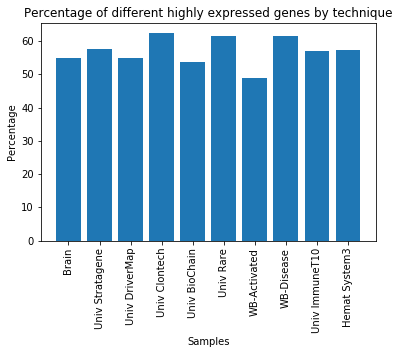

In [34]:
# Bar plot to visualize differences in number of high expressed genes per sample

x_axis = list(data_rnas.keys())
y = fq_list
plt.bar(x_axis, height=y)
plt.xticks(rotation=90)
plt.xlabel('Samples')
plt.ylabel('Percentage')
plt.title('Percentage of different highly expressed genes by technique');

## Partial conclusions and further questions

* The two techniques pick up very different highly expressing genes, but is the difference in TPMs really that different or is it only a construct of how we binned the data?
* Is the difference in number of TPMs on high expression genes between techniques significant?

# Analysis of difference in number of TPMs for highly expressed genes

In [43]:
# Function to get back values of TPM  for high expressing genes and chisquare analysis

def tpm_finder(df):
    
    # Get name of genes in high expressing df
    high_genes = list(df.index)
    
    tpm_dict_rnas = {}
    tpm_dict_dm = {}
    
    #  Make new dictionary with values of TPM per gene for both techniques
    for gene in high_genes:
        tpm_dict_rnas[gene] = data_rnas.loc[gene,'Brain']
    for gene in high_genes:
        tpm_dict_dm[gene] = data_dm.loc[gene,'Brain']
    
    # Make df with dictionary data
    df = pd.DataFrame([tpm_dict_rnas,tpm_dict_dm]).T
    df += 1 #to avoid zeros in chisquare
    df = df.rename(columns={0:'RNAseq',1:'DM'})
    
    # Apply chisquare test and get back results
    stat,pv = stats.chisquare(df['DM'],df['RNAseq'])
    if pv > 0.05:
        signif = 'not significant' 
    else:
        signif = 'significant'
    
    return df, pv, signif
    

In [44]:
# Apply function to all samples 

high_df_list = (high_brain_df, high_strata_df, high_driver_df, high_clon_df, high_bioch_df, high_rare_df, high_wb_a_df,
           high_wb_d_df, high_immune_df, high_hemat_df)

samples = ('Brain','Univ Stratage', 'Univ DriverMap', 'Univ Clontech', 'Univ BioChain', 'Univ Rare', 'WB Activated',
          'WB Disease', 'Univ Immune T10', 'Hemat System3')

for i in range(len(high_df_list)):
    df, pv, signif = tpm_finder(high_df_list[i])
    print(f'The difference in TPM values for {samples[i]} sample is {signif}, with a p-value of {pv}')


The difference in TPM values for Brain sample is significant, with a p-value of 0.0
The difference in TPM values for Univ Stratage sample is significant, with a p-value of 0.0
The difference in TPM values for Univ DriverMap sample is significant, with a p-value of 0.0
The difference in TPM values for Univ Clontech sample is significant, with a p-value of 0.0
The difference in TPM values for Univ BioChain sample is significant, with a p-value of 0.0
The difference in TPM values for Univ Rare sample is significant, with a p-value of 0.0
The difference in TPM values for WB Activated sample is significant, with a p-value of 0.0
The difference in TPM values for WB Disease sample is significant, with a p-value of 0.0
The difference in TPM values for Univ Immune T10 sample is significant, with a p-value of 0.0
The difference in TPM values for Hemat System3 sample is significant, with a p-value of 0.0


* Is the difference better or worse?

In [45]:
# Find mean difference between both techniques for each sample
mean_list={}

for i in range(len(high_df_list)):
    
    # Make new column with difference between both techniques
    new_df = tpm_finder(high_df_list[i])
    new_df = new_df[0]
    new_df['Diff'] = new_df['DM'] - new_df['RNAseq']
    
    # Take mean of differences
    mean_df = new_df['Diff'].mean()
    
    # Add to dictionary
    mean_list[samples[i]] = mean_df

mean_df = pd.DataFrame(mean_list, index=[0])
mean_df = mean_df.transpose()
mean_df = mean_df.rename(columns={0:'Mean of differences'})
mean_df

,Mean of differences
Brain,21.895028
Univ Stratage,-0.894473
Univ DriverMap,-3.469720
Univ Clontech,22.550872
Univ BioChain,3.152787
Univ Rare,-3.738083
WB Activated,-16.611852
WB Disease,-6.629711
Univ Immune T10,21.698694
Hemat System3,1.996045


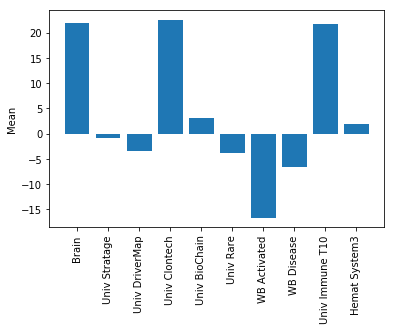

In [46]:
# Plot of means

plt.bar(x=mean_df.index, height=mean_df['Mean of differences'])
plt.ylabel('Mean')
plt.xticks(rotation=90);

## Partial conclusions:

* DM's ability to pick up highly expressed genes is significantly different from RNAseq, and only two samples have means of difference in favor of DM, meaning that on average, RNAseq gets more reads per highly expressed genes than DM.